# 02 - Exploratory Data Analysis (Drivers & Visuals)

In [21]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

filepath_train = r"../data/coral_students.csv"
df = pd.read_csv(filepath_train)

df.head()

,Sample_ID,Site_ID,ClimSST,Temperature_Kelvin,Temperature_Mean,Temperature_Minimum,Temperature_Maximum,Temperature_Kelvin_Standard_Deviation,Windspeed,SSTA,...,TSA_DHW,TSA_DHW_Standard_Deviation,TSA_DHWMax,TSA_DHWMean,Depth_m,Distance_to_Shore,Exposure,Turbidity,Cyclone_Frequency,Percent_Bleached
0,10274495.0,12082.0,301.65,303.50,299.79,293.35,305.54,2.52,2.0,0.49,...,1.27,0.74,6.05,0.22,8.3,8311.0,exposed,0.0586,56.583448,4.76
1,10274496.0,12083.0,299.31,300.84,299.75,293.68,305.44,2.54,6.0,-0.42,...,1.20,0.93,10.39,0.27,14.9,10747.0,exposed,0.0543,52.842523,21.88
2,10274497.0,12084.0,300.56,302.65,299.81,293.35,305.47,2.50,5.0,0.36,...,2.71,0.83,7.18,0.23,10.7,9396.0,exposed,0.0571,56.583448,19.66
3,10274498.0,12085.0,299.75,302.43,299.81,293.35,305.47,2.50,7.0,0.54,...,3.60,0.83,7.18,0.23,7.6,9408.0,exposed,0.0571,56.583448,28.03
4,10274499.0,12086.0,297.65,295.69,299.81,293.35,305.47,2.50,7.0,-0.91,...,0.00,0.83,7.18,0.23,10.0,9362.0,exposed,0.0571,56.583448,2.75


In [22]:
df.columns

Index(['Sample_ID', 'Site_ID', 'ClimSST', 'Temperature_Kelvin',
       'Temperature_Mean', 'Temperature_Minimum', 'Temperature_Maximum',
       'Temperature_Kelvin_Standard_Deviation', 'Windspeed', 'SSTA',
       'SSTA_Standard_Deviation', 'SSTA_Mean', 'SSTA_Minimum', 'SSTA_Maximum',
       'SSTA_Frequency', 'SSTA_Frequency_Standard_Deviation',
       'SSTA_FrequencyMax', 'SSTA_FrequencyMean', 'SSTA_DHW',
       'SSTA_DHW_Standard_Deviation', 'SSTA_DHWMax', 'SSTA_DHWMean', 'TSA',
       'TSA_Standard_Deviation', 'TSA_Minimum', 'TSA_Maximum', 'TSA_Mean',
       'TSA_Frequency', 'TSA_Frequency_Standard_Deviation', 'TSA_FrequencyMax',
       'TSA_FrequencyMean', 'TSA_DHW', 'TSA_DHW_Standard_Deviation',
       'TSA_DHWMax', 'TSA_DHWMean', 'Depth_m', 'Distance_to_Shore', 'Exposure',
       'Turbidity', 'Cyclone_Frequency', 'Percent_Bleached'],
      dtype='object')

our columns do comply with the documentation, so we'll use the df_column_descriptions as our main domain knowledge reference

In [23]:
print(df.loc[df["Percent_Bleached"] < 0, "Percent_Bleached"])
df.loc[df["Percent_Bleached"] < 0, "Percent_Bleached"].count()

52      -9.800000
300     -2.700000
587    -29.890000
773    -10.000000
827     -6.350000
870    -83.330000
885    -90.410000
1119    -1.000000
1377   -42.900000
1451   -20.000000
1452   -31.000000
1496   -68.421053
1569   -29.600000
1720   -27.300000
1755   -25.000000
2029   -39.600000
2100   -86.000000
2325    -2.802198
2456   -25.371798
2475   -20.353836
2836    -0.694444
3101    -6.352273
3154    -1.349432
3291   -13.280000
3394    -4.170000
3444   -52.170000
3596    -9.200000
3660   -20.000000
3714   -25.000000
3747   -10.000000
3755   -58.300000
3982   -25.000000
4043   -31.292874
4112    -1.841949
Name: Percent_Bleached, dtype: float64


34

we have discovered that there are negative values in the target variable, but it does not make sense to have negative values in the 'Percent_Bleached' since the biological standpoint -> our solution is to drop them since there are only 34 rows

In [24]:
df.drop(df[df["Percent_Bleached"] < 0].index, inplace=True)

In [25]:
print(df.loc[df["Percent_Bleached"] < 0, "Percent_Bleached"])
df.loc[df["Percent_Bleached"] < 0, "Percent_Bleached"].count()

Series([], Name: Percent_Bleached, dtype: float64)


0

In [26]:
target = df['Percent_Bleached']

In [27]:
target.describe()

count    4411.000000
mean       24.483928
std        33.864834
min        -0.000000
25%         1.719114
50%         9.000000
75%        34.461379
max       199.384383
Name: Percent_Bleached, dtype: float64

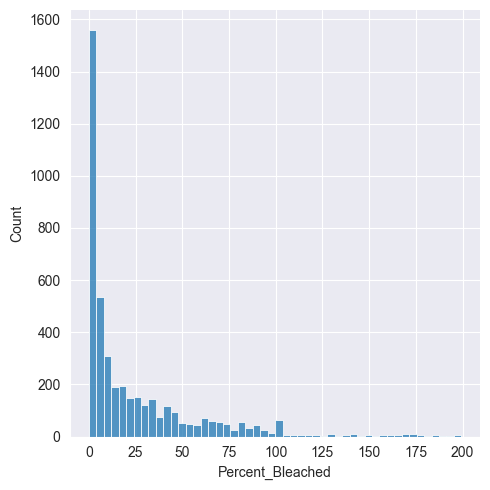

In [28]:
sns.displot(target)

In [29]:
print("Skewness: %f" % target.skew())
print("Kurtosis: %f" % target.kurt())

Skewness: 2.123239
Kurtosis: 5.171980


the data is right skewed and most of the data are clustered at the lower values, leptokurtic distribution which 
means we have either extreme outliers or quite complex relationship that we need to explore 

# Correlation among thermal indicators 

In [30]:
cols_of_interest = [
    "SSTA_Mean", "SSTA_DHWMean", "SSTA_Frequency",
    "SSTA", "TSA",
    "Temperature_Mean", "TSA_Mean",
    "SSTA_DHW", "TSA_DHW"
]

# Keep only columns that exist in your dataframe
cols_existing = [c for c in cols_of_interest if c in df.columns]
corr_subset = df[cols_existing].corr()

corr_subset


,SSTA_Mean,SSTA_DHWMean,SSTA_Frequency,SSTA,TSA,Temperature_Mean,TSA_Mean,SSTA_DHW,TSA_DHW
SSTA_Mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SSTA_DHWMean,NaN,1.000000,0.388119,0.284148,0.210112,-0.226193,0.078659,0.618183,0.706311
SSTA_Frequency,NaN,0.388119,1.000000,0.234673,0.135550,-0.150009,0.044645,0.605949,0.475810
SSTA,NaN,0.284148,0.234673,1.000000,0.661950,-0.131841,-0.047522,0.480990,0.424174
TSA,NaN,0.210112,0.135550,0.661950,1.000000,-0.022902,0.109636,0.385245,0.358207
Temperature_Mean,NaN,-0.226193,-0.150009,-0.131841,-0.022902,1.000000,0.675987,-0.126282,-0.089543
TSA_Mean,NaN,0.078659,0.044645,-0.047522,0.109636,0.675987,1.000000,0.148163,0.250294
SSTA_DHW,NaN,0.618183,0.605949,0.480990,0.385245,-0.126282,0.148163,1.000000,0.899304
TSA_DHW,NaN,0.706311,0.475810,0.424174,0.358207,-0.089543,0.250294,0.899304,1.000000


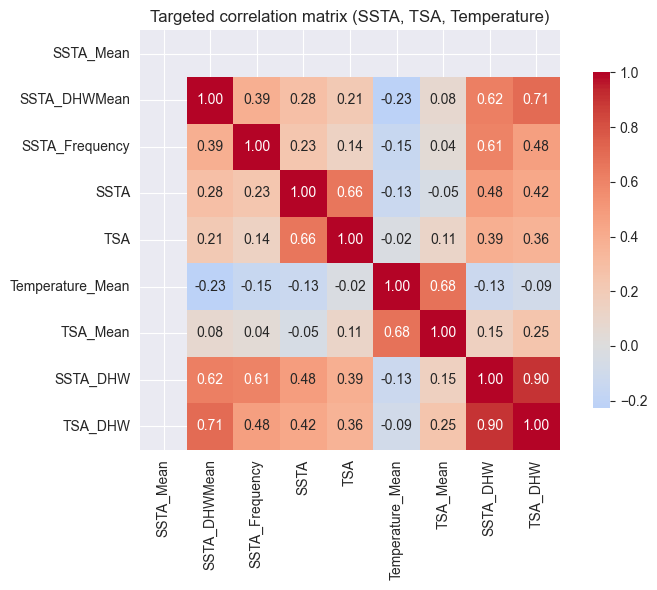

In [31]:
plt.figure(figsize=(8,6))
sns.heatmap(
    corr_subset,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    square=True,
    cbar_kws={"shrink": 0.8}
)
plt.title("Targeted correlation matrix (SSTA, TSA, Temperature)")
plt.tight_layout()
plt.show()

In [32]:
from pandas.api.types import is_numeric_dtype

constant_cols = [c for c in df.columns 
                 if is_numeric_dtype(df[c]) and df[c].nunique() <= 1]

print("Constant columns (drop for correlation):", constant_cols)

df_numeric = df.drop(columns=constant_cols)

pairs_filtered = [
    ("SSTA_DHW", "SSTA_Frequency"),
    ("SSTA_DHW", "TSA_DHW"),
    ("SSTA", "TSA"),
    ("Temperature_Mean", "TSA_Mean")
]

for a, b in pairs_filtered:
    if a in df_numeric.columns and b in df_numeric.columns:
        r = df_numeric[a].corr(df_numeric[b])
        print(f"{a} ↔ {b}: {r:.3f}")


Constant columns (drop for correlation): ['SSTA_Mean']
SSTA_DHW ↔ SSTA_Frequency: 0.606
SSTA_DHW ↔ TSA_DHW: 0.899
SSTA ↔ TSA: 0.662
Temperature_Mean ↔ TSA_Mean: 0.676


there is a correlaton SSTA_DHW ↔ TSA_DHW: 0.899 -> in the feature selection we should probably just use one of them to reduce high dimensionality

In [33]:
# Check count of non-NaN values
print(df[["SSTA_Mean", "SSTA_DHWMean"]].count())

# Check number of unique values
print(df[["SSTA_Mean", "SSTA_DHWMean"]].nunique())

# Check first few values
print(df[["SSTA_Mean", "SSTA_DHWMean"]].head(10))


SSTA_Mean       4411
SSTA_DHWMean    4411
dtype: int64
SSTA_Mean         1
SSTA_DHWMean    342
dtype: int64
   SSTA_Mean  SSTA_DHWMean
0        0.0          2.10
1        0.0          2.12
2        0.0          2.03
3        0.0          2.03
4        0.0          2.03
5        0.0          2.03
6        0.0          2.03
7        0.0          2.38
8        0.0          2.38
9        0.0          2.51


# Physical & Environmental indicators

In [34]:
numeric_pairs = [
    ("Depth_m", "Percent_Bleached"),
    ("Turbidity", "Percent_Bleached"),
    ("Windspeed", "SSTA_Frequency"),
    ("Windspeed", "TSA_Frequency"),
    ("Distance_to_Shore", "Turbidity")
]

# Compute Pearson correlation for each pair
for a, b in numeric_pairs:
    if a in df.columns and b in df.columns:
        # drop missing values for the pair
        valid = df[[a, b]].dropna()
        r = valid[a].corr(valid[b])
        print(f"{a} ↔ {b}: {r:.3f}")

Depth_m ↔ Percent_Bleached: -0.015
Turbidity ↔ Percent_Bleached: -0.071
Windspeed ↔ SSTA_Frequency: 0.041
Windspeed ↔ TSA_Frequency: 0.087
Distance_to_Shore ↔ Turbidity: 0.045


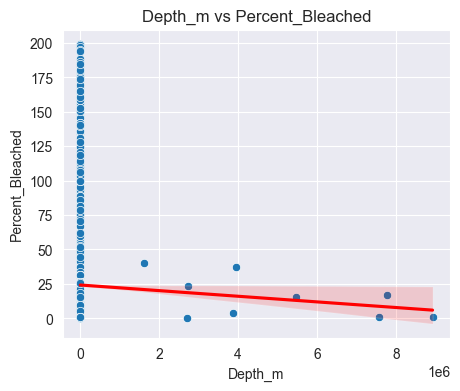

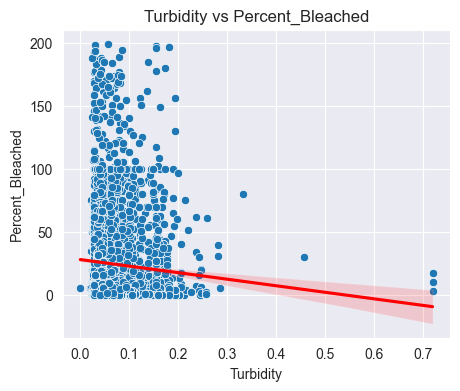

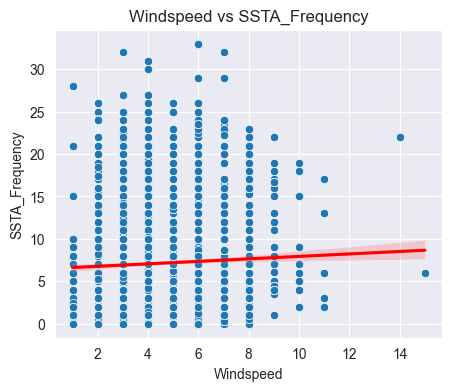

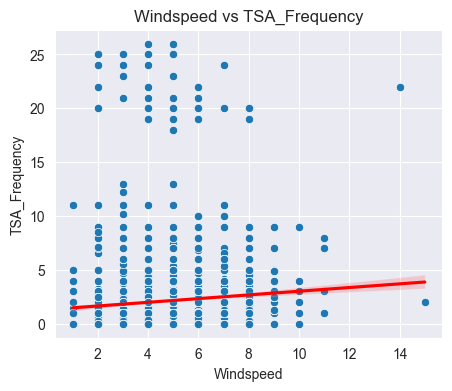

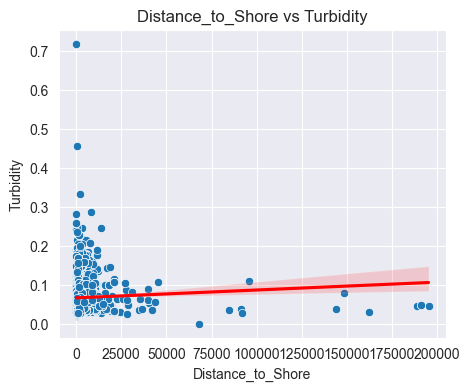

In [35]:
for a, b in numeric_pairs:
    if a in df.columns and b in df.columns:
        plt.figure(figsize=(5,4))
        sns.scatterplot(data=df, x=a, y=b)
        sns.regplot(data=df, x=a, y=b, scatter=False, color="red")  # trend line
        plt.title(f"{a} vs {b}")
        plt.show()


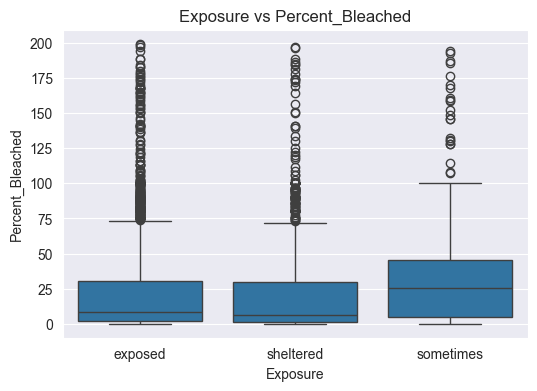

                   sum_sq      df          F        PR(>F)
C(Exposure)  5.738555e+04     2.0  25.294937  1.194289e-11
Residual     5.000121e+06  4408.0        NaN           NaN


In [36]:
# Exposure vs Percent_Bleached
if "Exposure" in df.columns and "Percent_Bleached" in df.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="Exposure", y="Percent_Bleached", data=df)
    plt.title("Exposure vs Percent_Bleached")
    plt.show()

    # Optional: ANOVA to check statistical differences
    import statsmodels.api as sm
    from statsmodels.formula.api import ols

    model = ols('Percent_Bleached ~ C(Exposure)', data=df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(anova_table)


# Site-Level and Structural Correlations

Goal: Check for clustering or non-independence.
Site_ID groups likely show internal correlation — visualize site-level means.
Heatmap by site can reveal which reefs experience consistently high anomalies and bleaching.
Use pairplots or grouped boxplots to visualize per-site relationships.

| **Method**                         | **Use it for**                                                            |
| ---------------------------------- | ------------------------------------------------------------------------- |
| **Correlation heatmap (Spearman)** | To capture nonlinear but monotonic relationships with `Percent_Bleached`. |
| **Scatterplots**                   | Visualize bleaching vs. SSTA/TSA/DHW/Depth/Turbidity.                     |
| **Boxplots**                       | Compare `Percent_Bleached` across `Exposure` or `Site_ID`.                |
| **Pairplot (seaborn)**             | Explore redundancy between temperature and anomaly metrics.               |
| **Feature importance (later)**     | Use correlation insights to guide feature selection for models.           |


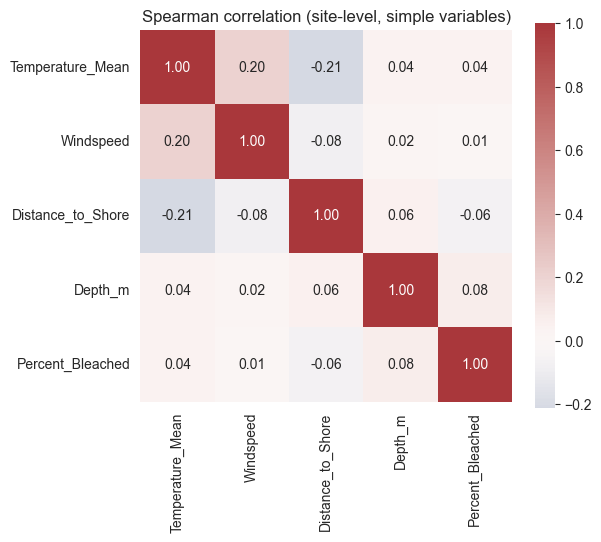

In [37]:
simple_cols = [
    "Temperature_Mean",  # average temperature
    "Windspeed",         # exposure
    "Distance_to_Shore", # offshore vs nearshore
    "Depth_m",           # shallow vs deep
    "Percent_Bleached"   # target
]
site_means_simple = df.groupby("Site_ID")[simple_cols].mean()

corr_simple = site_means_simple.corr(method="spearman")

plt.figure(figsize=(6,5))
sns.heatmap(
    corr_simple,
    annot=True,
    fmt=".2f",
    cmap="vlag",
    center=0,
    square=True
)
plt.title("Spearman correlation (site-level, simple variables)")
plt.show()


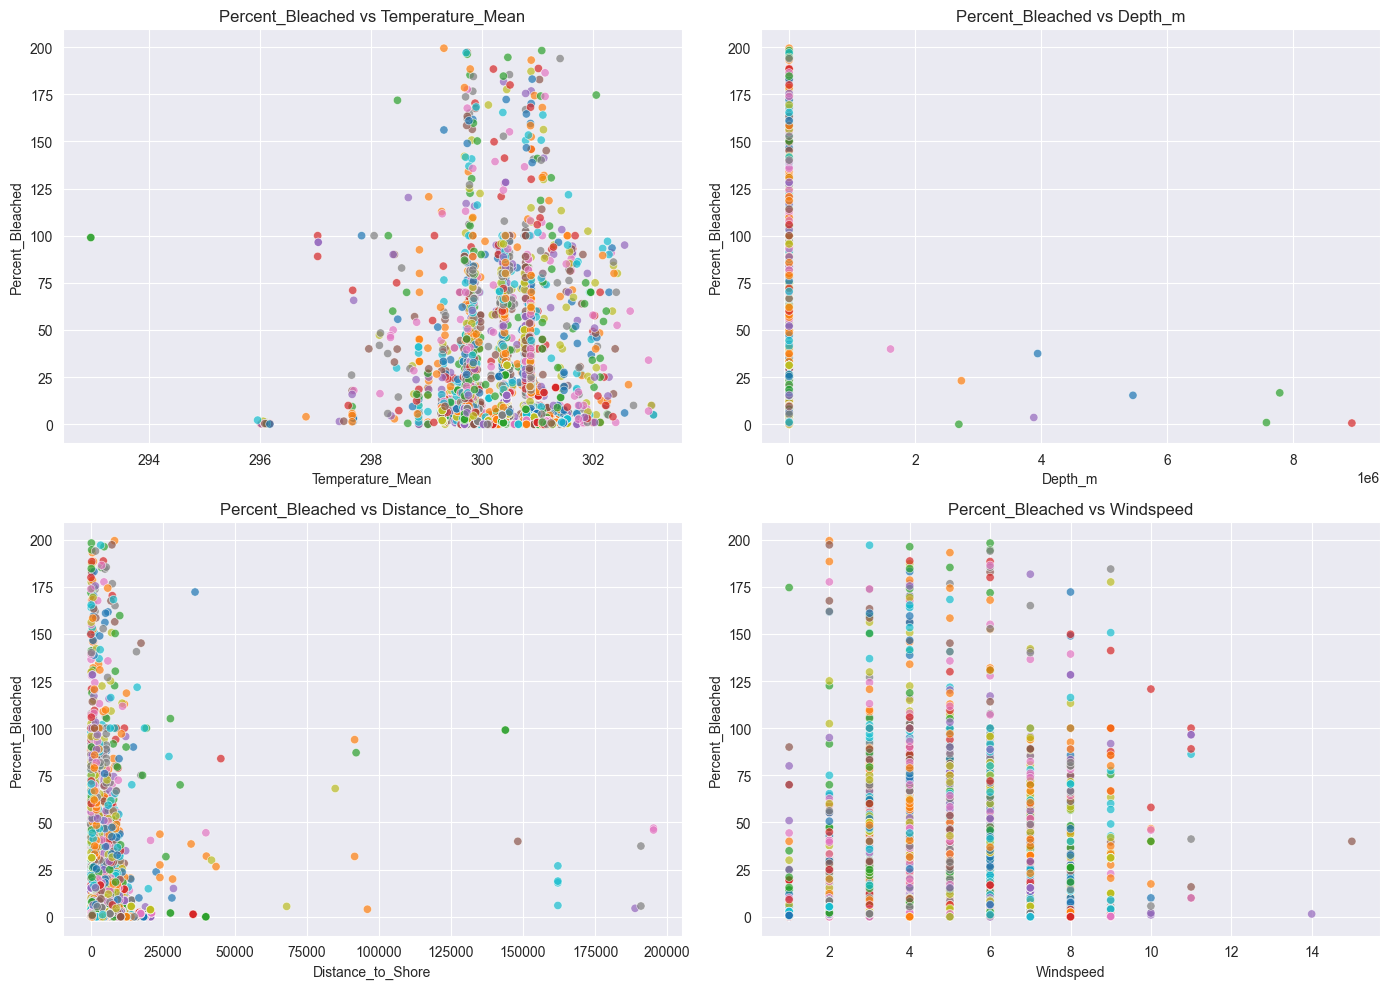

In [41]:
cols = ["Temperature_Mean", "Depth_m", "Distance_to_Shore", "Windspeed"]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # 2x2 grid
axes = axes.flatten()  

for ax, col in zip(axes, cols):
    sns.scatterplot(
        data=df, 
        x=col, 
        y="Percent_Bleached", 
        hue="Site_ID", 
        palette="tab10", 
        alpha=0.7,
        ax=ax
    )
    ax.set_title(f"Percent_Bleached vs {col}")
    ax.legend([], [], frameon=False)  

plt.tight_layout()
plt.show()


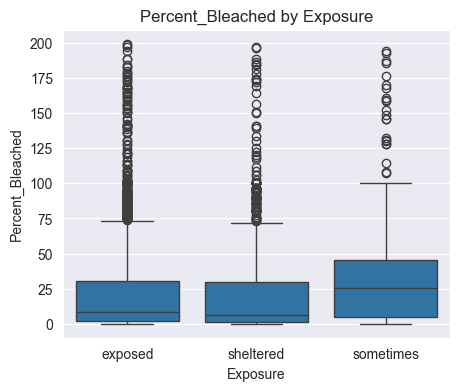

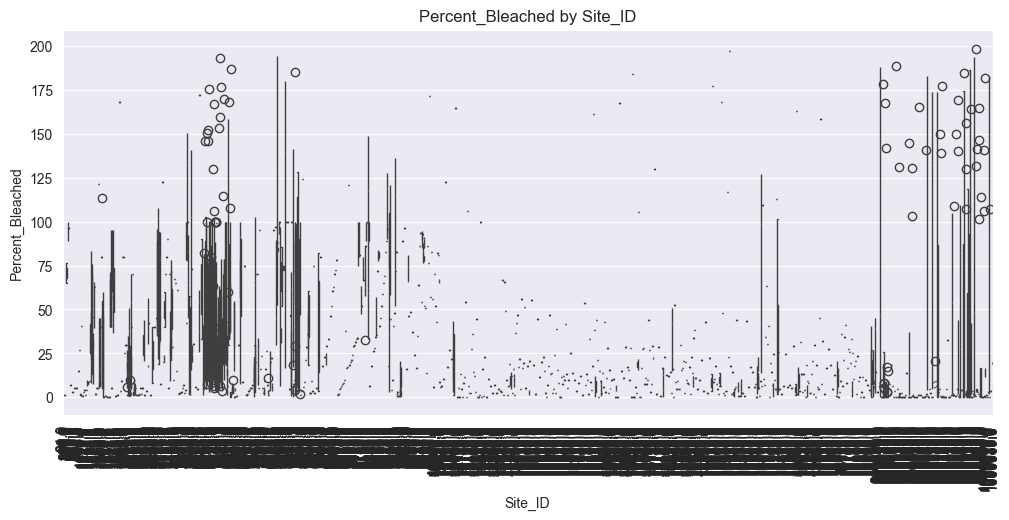

In [39]:
# Exposure
plt.figure(figsize=(5,4))
sns.boxplot(data=df, x="Exposure", y="Percent_Bleached")
plt.title("Percent_Bleached by Exposure")
plt.show()

# Site_ID (many sites → may need rotation)
plt.figure(figsize=(12,5))
sns.boxplot(data=df, x="Site_ID", y="Percent_Bleached")
plt.xticks(rotation=90)
plt.title("Percent_Bleached by Site_ID")
plt.show()


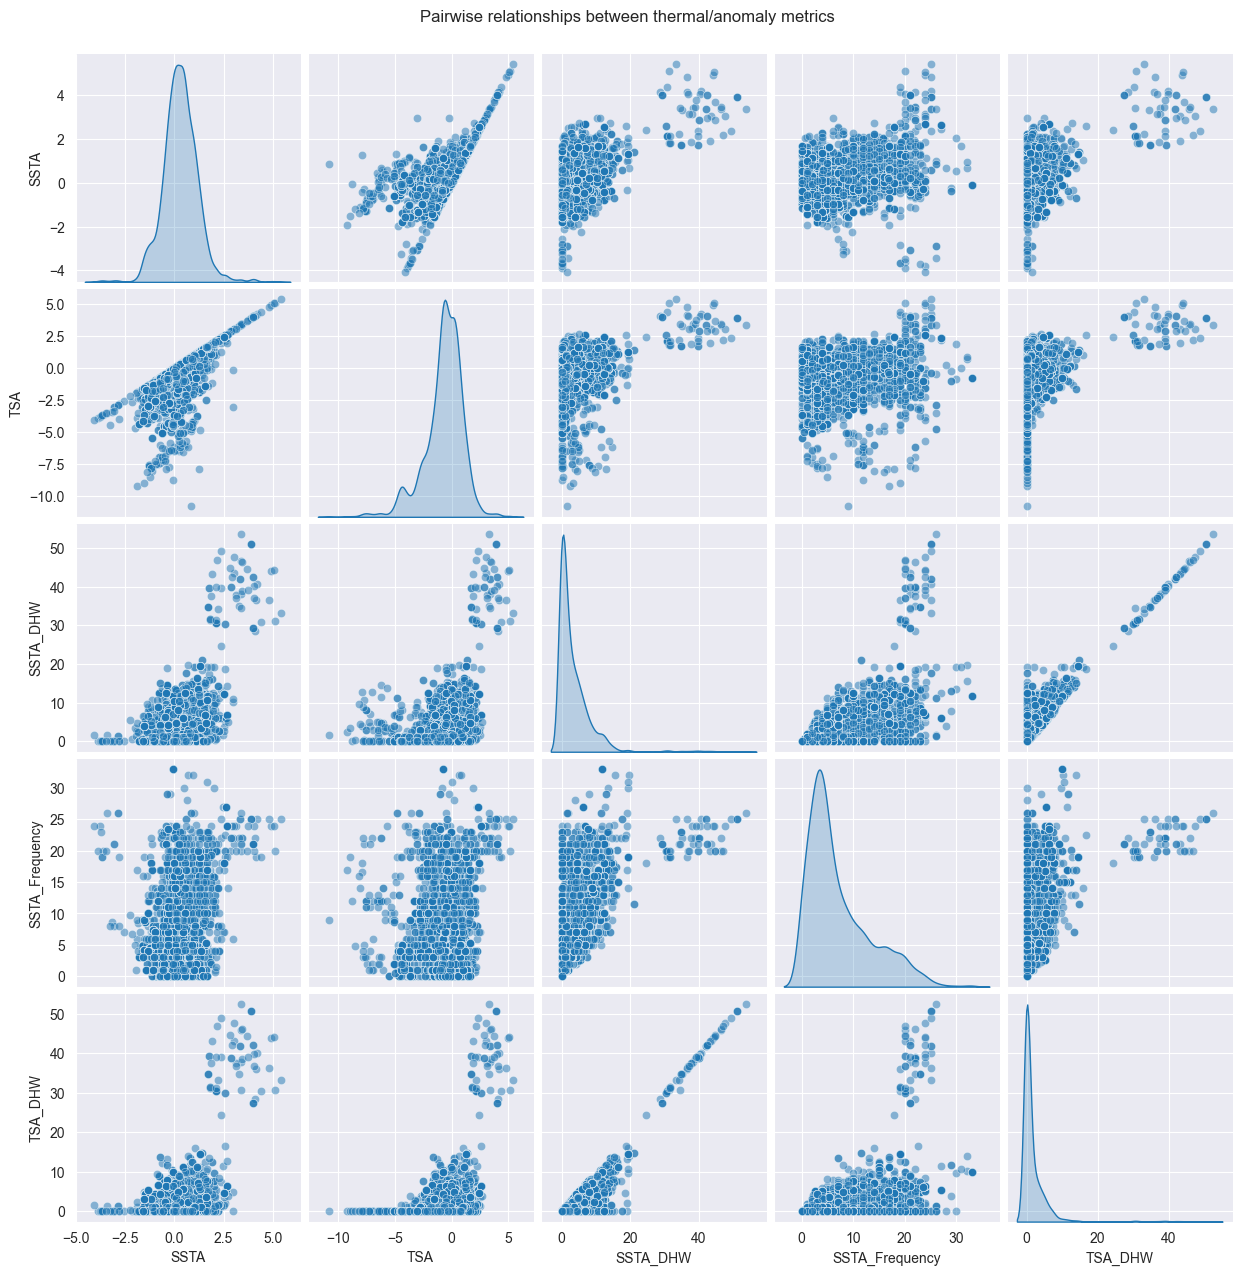

In [40]:
# Select only numeric anomaly/temperature metrics
pairplot_cols = ["SSTA", "TSA", "SSTA_DHW", "SSTA_Frequency", "TSA_DHW"]
sns.pairplot(df[pairplot_cols], kind="scatter", diag_kind="kde", plot_kws={"alpha":0.5})
plt.suptitle("Pairwise relationships between thermal/anomaly metrics", y=1.02)
plt.show()
